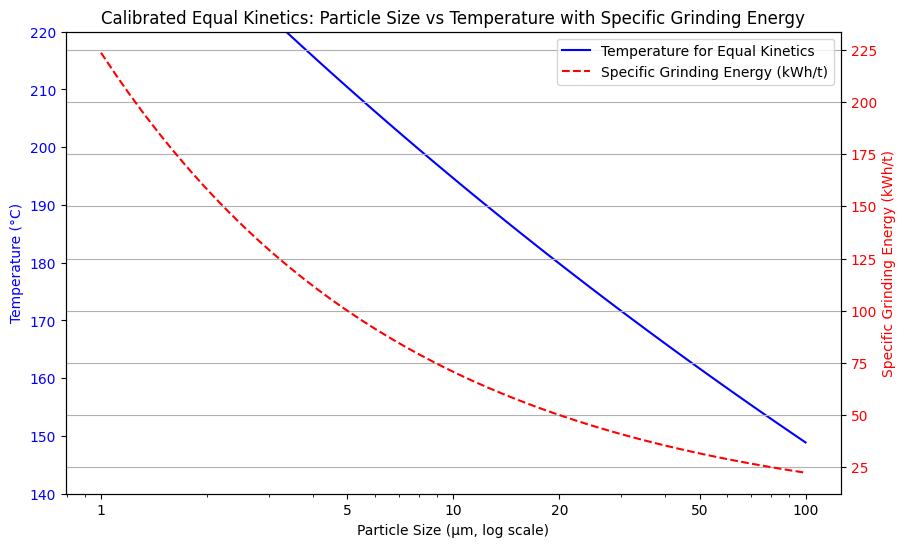

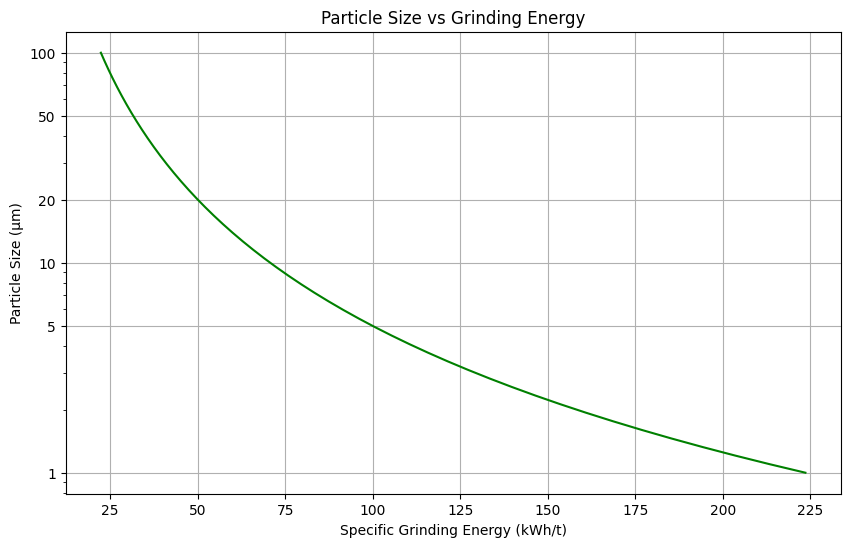

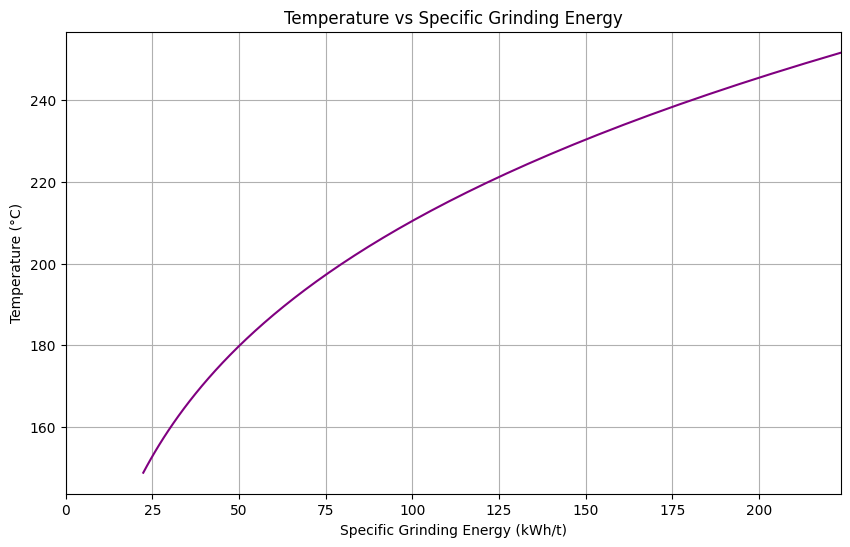

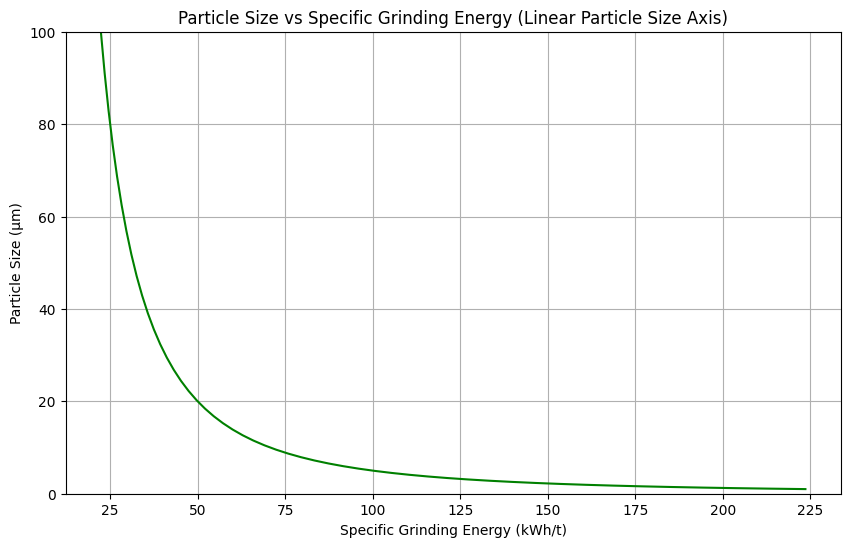

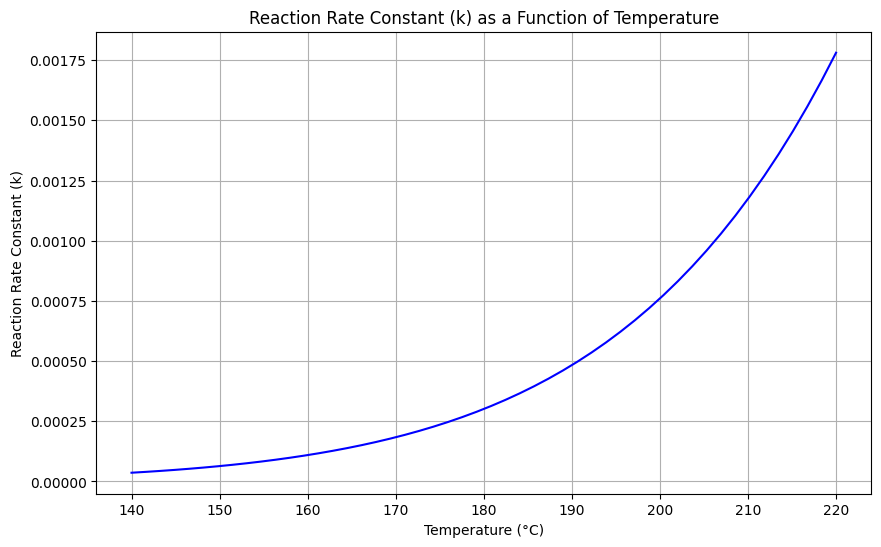

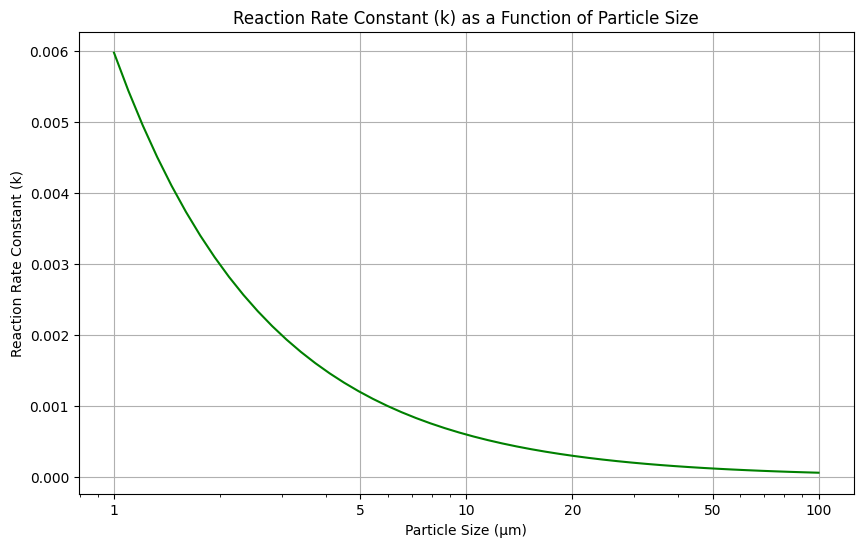

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Given data and constants
A = 1e6                      # Pre-exponential factor (example value)
Ea = 82.6e3                    # Activation energy in J/mol (example)
R = 8.314                    # Gas constant J/(mol K)
T_ref_celsius = 180          # Reference temperature in Celsius
T_ref = T_ref_celsius + 273  # Convert to Kelvin
d_ref = 20                   # Reference particle size in microns

# Calculate rate constant at reference conditions using Arrhenius equation
k_ref = A * np.exp(-Ea / (R * T_ref))

# Define particle size range (log scale from 1 to 100 microns)
particle_sizes = np.logspace(0, 2, 50)  # Particle sizes from 1 to 100 microns

# Temperature needed to achieve 'equal kinetics' for each particle size
temperatures_for_equal_kinetics = []
for d in particle_sizes:
    # Calculate the rate constant for maintaining equal kinetics
    k = k_ref * d_ref / d  # Scale rate constant based on particle size

    # Solve for temperature T
    T = Ea / (R * np.log(A / k))
    temperatures_for_equal_kinetics.append(T)

# Convert temperature from Kelvin to Celsius for plotting
temperatures_for_equal_kinetics_celsius = np.array(temperatures_for_equal_kinetics) - 273.15

# Calibrate Specific Grinding Energy based on 50 kWh/t at 20 microns
# Assume SGE follows Bond's Law and scale to fit given point
sge_calibrated = 50 * (d_ref / particle_sizes)**0.5  # Adjust based on 20 microns = 50 kWh/t

# Plotting the first graph: Temperature vs Particle Size (with Grinding Energy)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot temperature on primary y-axis in Celsius
ax1.plot(particle_sizes, temperatures_for_equal_kinetics_celsius, color='b', label='Temperature for Equal Kinetics')
ax1.set_xlabel('Particle Size (µm, log scale)')
ax1.set_xscale('log')
ax1.set_xticks([1, 5, 10, 20, 50, 100])  # Custom ticks for clarity
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal numeric labels for log scale
ax1.set_ylabel('Temperature (°C)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim([140, 220])  # Set temperature range to 140°C to 220°C

# Plot Specific Grinding Energy on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(particle_sizes, sge_calibrated, color='r', linestyle='--', label='Specific Grinding Energy (kWh/t)')
ax2.set_ylabel('Specific Grinding Energy (kWh/t)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding a legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title("Calibrated Equal Kinetics: Particle Size vs Temperature with Specific Grinding Energy")
plt.grid(True)
plt.show()

# Second graph: Particle Size vs Grinding Energy
fig2, ax3 = plt.subplots(figsize=(10, 6))
ax3.plot(sge_calibrated, particle_sizes, color='g', label='Particle Size vs Grinding Energy')
ax3.set_xlabel('Specific Grinding Energy (kWh/t)')
ax3.set_ylabel('Particle Size (µm)')
ax3.set_yscale('log')
ax3.set_yticks([1, 5, 10, 20, 50, 100])  # Custom ticks for clarity
ax3.get_yaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal numeric labels for log scale

plt.title("Particle Size vs Grinding Energy")
plt.grid(True)
plt.show()

# Third graph: Temperature vs Grinding Energy based on calibrated relations
fig3, ax4 = plt.subplots(figsize=(10, 6))
ax4.plot(sge_calibrated, temperatures_for_equal_kinetics_celsius, color='purple', label='Temperature vs Grinding Energy')
ax4.set_xlabel('Specific Grinding Energy (kWh/t)')
ax4.set_ylabel('Temperature (°C)')
ax4.set_xlim([0, max(sge_calibrated)])  # Set x-axis limit to show full energy range

plt.title("Temperature vs Specific Grinding Energy")
plt.grid(True)
plt.show()


# Plotting Specific Grinding Energy vs Particle Size with a linear particle size vertical axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sge_calibrated, particle_sizes, color='g', label='Particle Size vs Grinding Energy')
ax.set_xlabel('Specific Grinding Energy (kWh/t)')
ax.set_ylabel('Particle Size (µm)')
ax.set_ylim([0, 100])  # Set y-axis limit to show full particle size range

plt.title("Particle Size vs Specific Grinding Energy (Linear Particle Size Axis)")
plt.grid(True)
plt.show()
# Define temperature range in Kelvin (140°C to 220°C)
temperatures = np.linspace(140 + 273.15, 220 + 273.15, 50)  # Temperature range in Kelvin

# Calculate k as a function of temperature using Arrhenius equation
k_values_temperature = A * np.exp(-Ea / (R * temperatures))

# Plot k as a function of temperature
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(temperatures - 273.15, k_values_temperature, color='b')  # Convert Kelvin to Celsius
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Reaction Rate Constant (k)')
#ax.set_ylim([0, 5])  # Limit y-axis to match range of k vs temperature graph
ax.set_title('Reaction Rate Constant (k) as a Function of Temperature')
plt.grid(True)
plt.show()

# Define particle sizes array (logarithmic scale from 1 to 100 microns)
particle_sizes = np.logspace(0, 2, 50)  # Particle sizes from 1 to 100 microns

# Calculate k as a function of particle size, scaled to a reference value at 20 microns
k_values_particle_size = k_ref * d_ref / particle_sizes

# Plot k as a function of particle size on a logarithmic x-axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(particle_sizes, k_values_particle_size, color='g')
ax.set_xscale('log')
ax.set_xlabel('Particle Size (µm)')
ax.set_ylabel('Reaction Rate Constant (k)')
# ax.set_ylim([0, 5])  # Limit y-axis to match range of k vs temperature graph
ax.set_xticks([1, 5, 10, 20, 50, 100])  # Set ticks for clarity
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Normal labels for log scale

plt.title('Reaction Rate Constant (k) as a Function of Particle Size')
plt.grid(True)
plt.show()

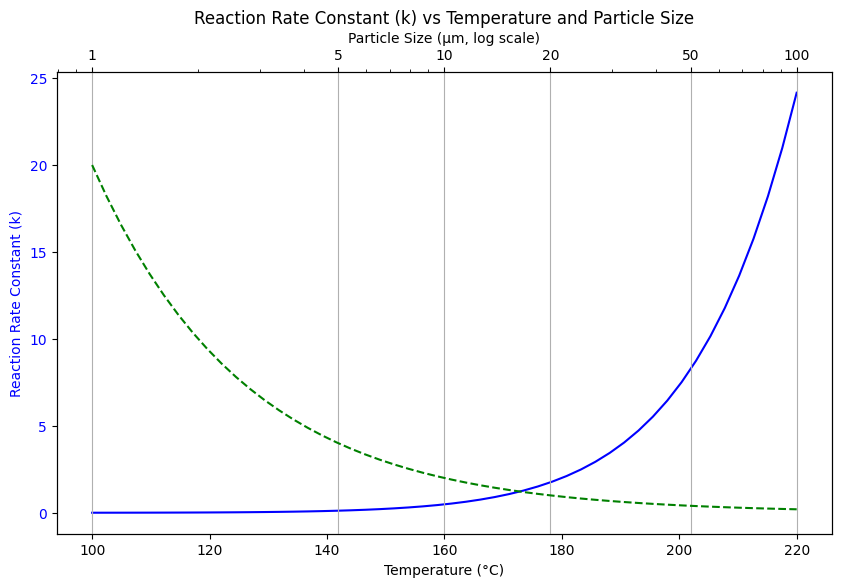

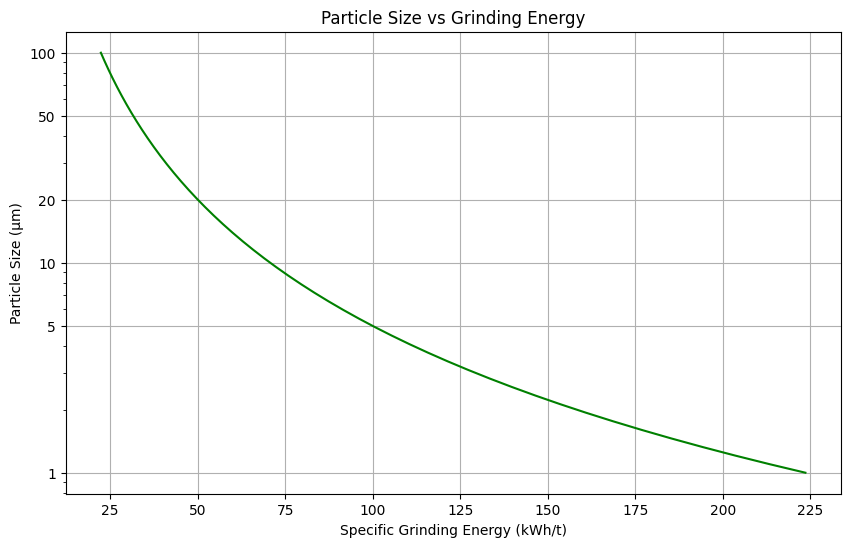

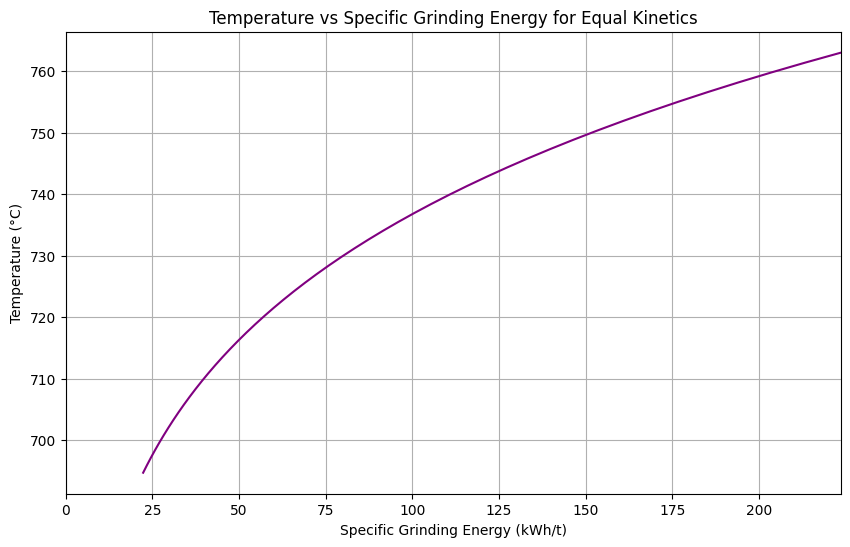

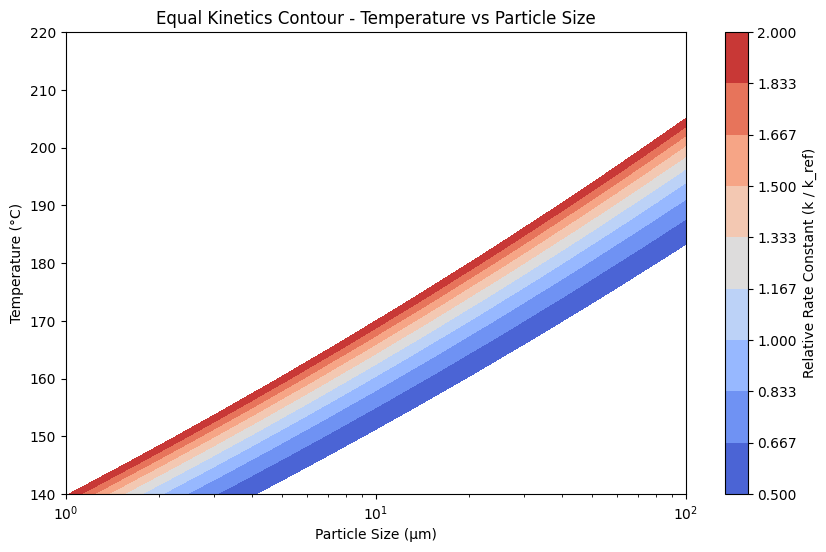

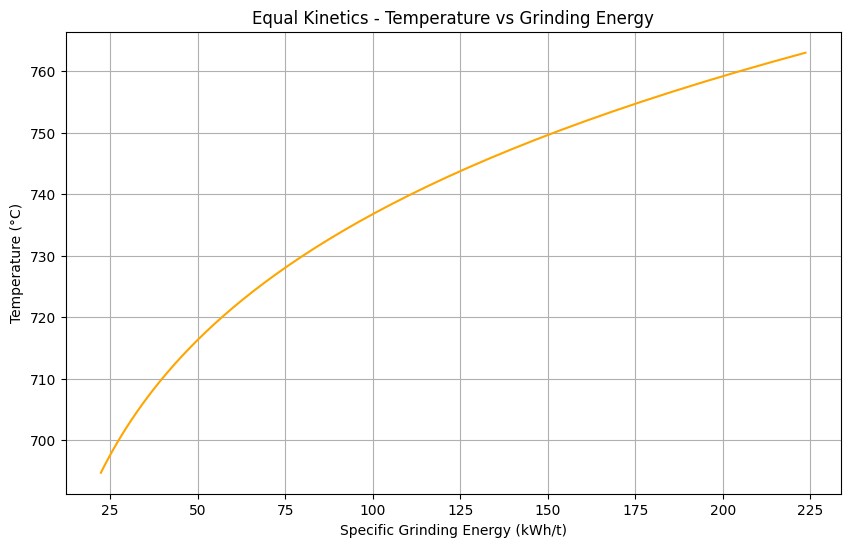

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Gas constant in J/(mol K)

# Reference conditions
d_ref = 20                    # Reference particle size in microns
sge_ref = 50                  # Grinding energy at 15 microns is 50 kWh/t
T_ref_celsius = 170           # Reference temperature in Celsius
T_ref = T_ref_celsius + 273.15  # Convert to Kelvin
T_increase_celsius = 180      # Temperature for doubling rate
T_increase = T_increase_celsius + 273.15

# Step 1: Calibrate Activation Energy (Ea) using rate doubling reference
rate_ratio = 2  # Doubling rate
Ea = -np.log(rate_ratio) * R / (1/T_increase - 1/T_ref)  # Estimated Ea based on doubling rate

# Step 2: Set up the Arrhenius function using calibrated Ea and reference temperature
A = rate_ratio / np.exp(-Ea / (R * T_increase))  # Calibrate A based on doubling rate

# Step 3: Define function for rate constant k as a function of temperature and particle size
def rate_constant(T, d, T_ref=T_ref, d_ref=d_ref):
    k_T = A * np.exp(-Ea / (R * T))
    k_d = k_T * (d_ref / d)  # Scale with particle size, assuming rate scales with specific surface area
    return k_d

# Temperature range for plotting
temperatures = np.linspace(140 + 273.15, 220 + 273.15, 50)  # Temperature range in Kelvin
particle_sizes = np.logspace(0, 2, 50)  # Particle sizes from 1 to 100 microns

# Step 4: Calculate rate constants for temperature and particle size ranges
k_values_temperature = [rate_constant(T, d_ref) for T in temperatures]
k_values_particle_size = [rate_constant(T_ref, d) for d in particle_sizes]

# Plot 1: Reaction Rate as a Function of Temperature and Particle Size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot reaction rate as a function of temperature (primary x-axis)
ax1.plot(temperatures - 273.15, k_values_temperature, color='b', label='Rate Constant vs Temperature')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Reaction Rate Constant (k)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot reaction rate as a function of particle size (secondary x-axis)
ax2 = ax1.twiny()
ax2.plot(particle_sizes, k_values_particle_size, color='g', linestyle='--', label='Rate Constant vs Particle Size')
ax2.set_xlabel('Particle Size (µm, log scale)')
ax2.set_xscale('log')
ax2.set_xticks([1, 5, 10, 20, 50, 100])  # Custom ticks for clarity
ax2.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Normal labels for log scale

plt.title('Reaction Rate Constant (k) vs Temperature and Particle Size')
plt.grid(True)
plt.show()

# Step 5: Specific Grinding Energy as a Function of Particle Size
sge_calibrated = sge_ref * (d_ref / particle_sizes)**0.5  # Calibrate based on 20 microns = 50 kWh/t

fig2, ax3 = plt.subplots(figsize=(10, 6))
ax3.plot(sge_calibrated, particle_sizes, color='g', label='Particle Size vs Grinding Energy')
ax3.set_xlabel('Specific Grinding Energy (kWh/t)')
ax3.set_ylabel('Particle Size (µm)')
ax3.set_yscale('log')
ax3.set_yticks([1, 5, 10, 20, 50, 100])  # Custom ticks for clarity
ax3.get_yaxis().set_major_formatter(plt.ScalarFormatter())  # Set normal numeric labels for log scale

plt.title("Particle Size vs Grinding Energy")
plt.grid(True)
plt.show()

# Step 6: Temperature vs Grinding Energy for Equal Kinetics
# Calculate temperatures for equal kinetics across different particle sizes
equal_kinetics_temps = [Ea / (R * np.log(A / rate_constant(T_ref, d))) + 273.15 for d in particle_sizes]

fig3, ax4 = plt.subplots(figsize=(10, 6))
ax4.plot(sge_calibrated, equal_kinetics_temps, color='purple', label='Temperature vs Grinding Energy')
ax4.set_xlabel('Specific Grinding Energy (kWh/t)')
ax4.set_ylabel('Temperature (°C)')
ax4.set_xlim([0, max(sge_calibrated)])  # Set x-axis limit to show full energy range

plt.title("Temperature vs Specific Grinding Energy for Equal Kinetics")
plt.grid(True)
plt.show()

# Step 7: Equal Kinetics Contour Plot - Temperature vs Particle Size
# Define a grid of particle sizes and temperatures for contour plotting
temperature_range_celsius = np.linspace(140, 220, 50)  # Temperature range in Celsius
particle_size_range = np.logspace(0, 2, 50)  # Particle size from 1 to 100 microns
contour_T, contour_d = np.meshgrid(temperature_range_celsius, particle_size_range)

# Calculate rate constant across grid for contour levels
rate_contour = rate_constant(contour_T + 273.15, contour_d, T_ref, d_ref) / rate_constant(T_ref, d_ref)

fig4, ax5 = plt.subplots(figsize=(10, 6))
contour_plot = ax5.contourf(contour_d, contour_T, rate_contour, levels=np.linspace(0.5, 2.0, 10), cmap='coolwarm')
plt.colorbar(contour_plot, label='Relative Rate Constant (k / k_ref)')
ax5.set_xscale('log')
ax5.set_xlabel('Particle Size (µm)')
ax5.set_ylabel('Temperature (°C)')
ax5.set_title("Equal Kinetics Contour - Temperature vs Particle Size")

plt.show()

# Step 8: Equal Kinetics Plot - Temperature vs Grinding Energy
fig5, ax6 = plt.subplots(figsize=(10, 6))
ax6.plot(sge_calibrated, equal_kinetics_temps, color='orange', label='Temperature for Equal Kinetics')
ax6.set_xlabel('Specific Grinding Energy (kWh/t)')
ax6.set_ylabel('Temperature (°C)')
ax6.set_title("Equal Kinetics - Temperature vs Grinding Energy")
plt.grid(True)
plt.show()
